# 3d_plotting

In [1]:
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.colors

In [2]:
loc_data = pd.read_csv('./data/O_atom_location.csv')
atom_data = pd.read_csv('./data/atom_property.csv')

In [3]:
name_number = {}
for i in range(len(atom_data)):
    name_number[atom_data['Symbol'][i]]=atom_data['Atomic Number'][i]

In [4]:
xmax1, xmin1 = max(loc_data['x']), min(loc_data['x'])
ymax1, ymin1 = max(loc_data['y']), min(loc_data['y'])
zmax1, zmin1 = max(loc_data['z']), min(loc_data['z'])

In [5]:
vmax, vmin = max(atom_data['Atomic Number']), min (atom_data['Atomic Number'])
cmap = plt.cm.rainbow
norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)

In [6]:
def plot_3d_scatter1(idx):
    data = loc_data[loc_data['num']==idx]
    atoms = list(data['atom'])
    for i in range(len(atoms)):
        atoms[i] = name_number[atoms[i]]
    x = list(data['x'])
    y = list(data['y'])
    z = list(data['z'])
       
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    m = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
    
    ax.scatter(x, y, z, c=m.to_rgba(atoms))
    ax.grid(False)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_xlim(xmin1, xmax1)
    ax.set_ylim(ymin1, ymax1)
    ax.set_zlim(zmin1, zmax1)
    
    # plt.axis('off')
    # file_name = './3d_plot/'+str(idx)+' material 3d plot.png'
    # fig.savefig(file_name, bbox_inches='tight')
    plt.show()
    plt.close()

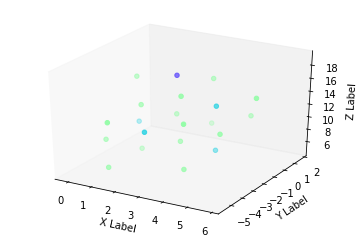

In [7]:
# 1~1520 is available
for i in range(1):
    plot_3d_scatter1(i+1)

## set as ((xmin+xmax)/2, (ymin+ymax)/2, (zmin+zmax)/2) = (0, 0, 0)

In [8]:
xmid = (xmin1+xmax1)/2
ymid = (ymin1+ymax1)/2
zmid = (zmin1+zmax1)/2

xmax2, xmin2 = xmax1-xmid, xmin1-xmid
ymax2, ymin2 = ymax1-ymid, ymin1-ymid
zmax2, zmin2 = zmax1-zmid, zmin1-zmid

In [61]:
def plot_3d_scatter2(idx):
    data = loc_data[loc_data['num']==idx]
    atoms = list(data['atom'])
    for i in range(len(atoms)):
        atoms[i] = name_number[atoms[i]]
    x = list(data['x']) - xmid
    y = list(data['y']) - ymid
    z = list(data['z']) - zmid
       
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    m = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
    
    ax.scatter(x, y, z, c=m.to_rgba(atoms))
    ax.grid(False)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_xlim(xmin2, xmax2)
    ax.set_ylim(ymin2, ymax2)
    ax.set_zlim(zmin2, zmax2)
    
    plt.axis('off')
    file_name = './3d_plot/'+str(idx)+' material 3d plot.png'
    fig.savefig(file_name, bbox_inches='tight')
    #plt.show()
    plt.close()

In [62]:
# 1~1520 is available
for i in range(1520):
    plot_3d_scatter2(i+1)

# 3d rotation

In [11]:
import numpy as np

In [12]:
def make_rot_mat(a, b, c):
    R_x = np.array([[1,0,0],[0,np.cos(2*np.pi*a),-np.sin(2*np.pi*a)],[0,np.sin(2*np.pi*a),np.cos(2*np.pi*a)]])
    R_y = np.array([[np.cos(2*np.pi*b),0,np.sin(2*np.pi*b)],[0,1,0],[-np.sin(2*np.pi*b),0,np.cos(2*np.pi*b)]])
    R_z = np.array([[np.cos(2*np.pi*c),-np.sin(2*np.pi*c),0],[np.sin(2*np.pi*c),np.cos(2*np.pi*c),0],[0,0,1]])
    rot_mat = np.matmul(R_z,np.matmul(R_x,R_y))
    return rot_mat

In [13]:
rot_mat = make_rot_mat(np.random.rand(), np.random.rand(), np.random.rand())

In [14]:
new_loc_data = loc_data.copy()
new_loc_data['x'] = loc_data['x']-xmid
new_loc_data['y'] = loc_data['y']-ymid
new_loc_data['z'] = loc_data['z']-zmid

In [15]:
rot_data = np.matmul(new_loc_data.drop(['num','atom'], axis=1), rot_mat)

In [35]:
X = []; Y = []; Z = []
for i in range(len(rot_data)):
    X.append(rot_data[i][0])
    Y.append(rot_data[i][1])
    Z.append(rot_data[i][2])
    
new_loc_data['x']=X
new_loc_data['y']=Y
new_loc_data['z']=Z

In [63]:
def plot_3d_scatter3(idx):
    data = new_loc_data[new_loc_data['num']==idx]
    atoms = list(data['atom'])
    for i in range(len(atoms)):
        atoms[i] = name_number[atoms[i]]
    x = list(data['x'])
    y = list(data['y'])
    z = list(data['z'])
       
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    m = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
    
    ax.scatter(x, y, z, c=m.to_rgba(atoms))
    ax.grid(False)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_xlim(xmin2, xmax2)
    ax.set_ylim(ymin2, ymax2)
    ax.set_zlim(zmin2, zmax2)
    
    plt.axis('off')
    file_name = './3d_plot_rot/'+str(idx)+' material 3d plot.png'
    fig.savefig(file_name, bbox_inches='tight')
    #plt.show()
    plt.close()

In [64]:
# 1~1520 is available
for i in range(1520):
    plot_3d_scatter3(i+1)